# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


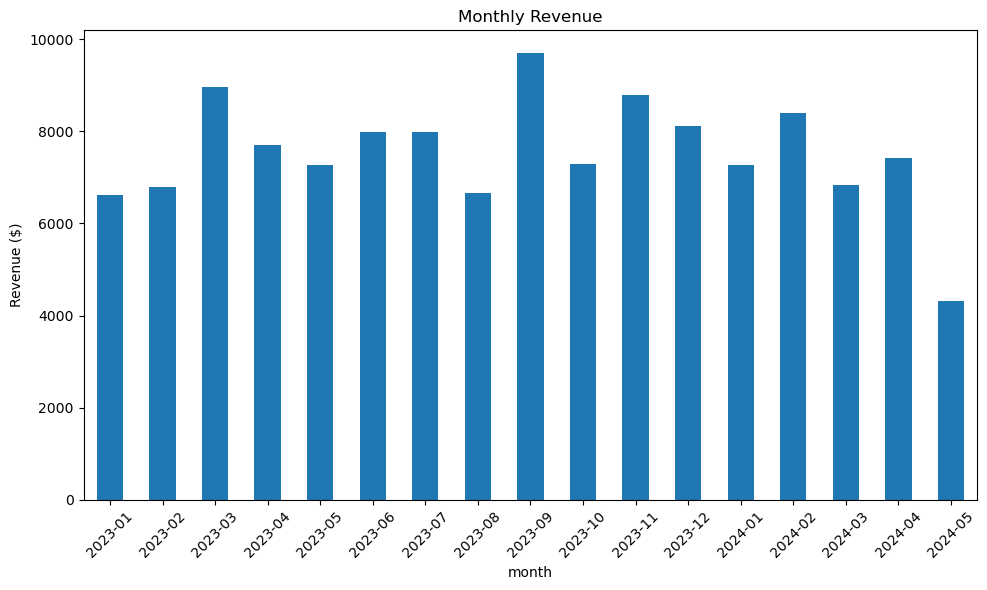

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total revenue in 2024Q1: $22,493.23


,month,revenue
0,2024-01,7268.59
1,2024-02,8388.91
2,2024-03,6835.73


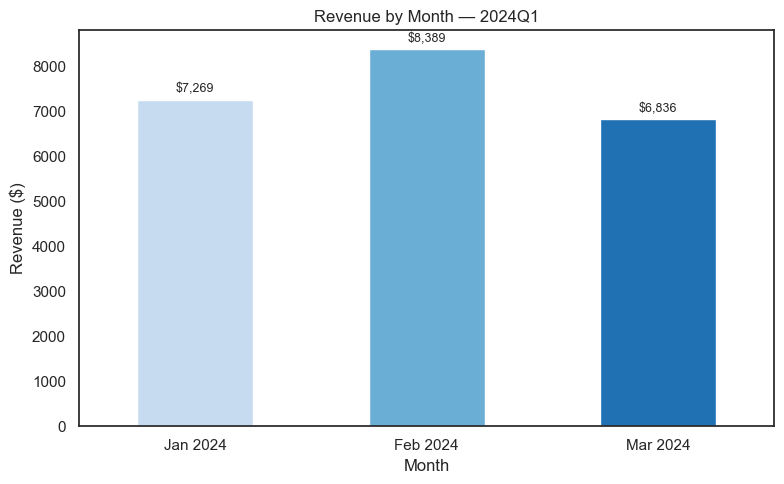

The last quarter had a total revenue of $22,493.23.
The peak revenue was in February, likely due to President's Day sales or Valentine's Day shoppers.
The final month showed lower sales, though normally retail stores have their lowest sales in January.
This could be due to post-holiday spending fatigue among customers, or an issue with business planning.


In [9]:
import IPython.display 

# Ensure data is available
try:
    if 'data' not in globals():
        data = pd.read_csv('ecommerce_data.csv')
except FileNotFoundError:
    raise FileNotFoundError("ecommerce_data.csv not found. Please run the 'Dataset Setup' cell at the top of the notebook, then rerun this cell.")

# Ensure proper dtypes and helpful columns exist
data['order_date'] = pd.to_datetime(data['order_date'])

# Determine the most recent complete quarter in the dataset
monthly_presence = (
    data.assign(month=data['order_date'].dt.to_period('M'), q=data['order_date'].dt.to_period('Q'))
        .groupby('q')['month'].nunique()
)
complete_quarters = monthly_presence[monthly_presence >= 3].index
last_quarter = complete_quarters.max() if len(complete_quarters) else data['order_date'].dt.to_period('Q').max()

# Filter to last quarter
mask_last_q = data['order_date'].dt.to_period('Q') == last_quarter
data_last_q = data.loc[mask_last_q].copy()

# Monthly breakdown within the last quarter
monthly_rev = (
    data_last_q.groupby(data_last_q['order_date'].dt.to_period('M'))['revenue']
    .sum()
    .sort_index()
)

total_revenue = monthly_rev.sum()

# Display numeric results
monthly_df = monthly_rev.reset_index()
monthly_df.columns = ['month', 'revenue']
monthly_df['month'] = monthly_df['month'].astype(str)
print(f"Total revenue in {last_quarter}: ${total_revenue:,.2f}")
display(monthly_df)

# Visualization — bar chart of revenue by month in the last quarter (no grid)
sns.set(style='white')  # remove grid styling
fig, ax = plt.subplots(figsize=(8, 5))
colors = sns.color_palette('Blues', n_colors=len(monthly_rev))
monthly_rev.plot(kind='bar', color=colors, ax=ax)

# Pretty x-axis labels (e.g., Jan 2024)
labels = [p.to_timestamp().strftime('%b %Y') for p in monthly_rev.index]
ax.set_xticklabels(labels, rotation=0)
ax.set_title(f"Revenue by Month — {str(last_quarter)}")
ax.set_ylabel('Revenue ($)')
ax.set_xlabel('Month')
ax.grid(False)  # ensure no grid is shown

# Annotate bars with dollar values
for patch, val in zip(ax.patches, monthly_rev.values):
    ax.annotate(f"${val:,.0f}",
                (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                ha='center', va='bottom', fontsize=9,
                xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()

# interpretation
interpretation = f"""The last quarter had a total revenue of ${total_revenue:,.2f}.
The peak revenue was in February, likely due to President's Day sales or Valentine's Day shoppers.
The final month showed lower sales, though normally retail stores have their lowest sales in January.
This could be due to post-holiday spending fatigue among customers, or an issue with business planning."""
print(interpretation)

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [ ]:
# Ensure data is available
try:
    data
except NameError:
    import pandas as pd
    try:
        data = pd.read_csv('ecommerce_data.csv')
    except FileNotFoundError:
        raise FileNotFoundError("ecommerce_data.csv not found. Please run the 'Dataset Setup' cell at the top of the notebook, then rerun this cell.")

# Compute top 5 customers by total revenue
top5 = (
    data.groupby('customer_id', as_index=False)['revenue']
        .sum()
        .rename(columns={'revenue': 'total_revenue'})
        .sort_values('total_revenue', ascending=False)
        .head(5)
        .reset_index(drop=True)
)

top5_display = top5.copy()
top5_display.insert(0, 'rank', range(1, len(top5_display) + 1))
top5_display['total_revenue'] = top5_display['total_revenue'].map(lambda x: f"${x:,.2f}")

styler = top5_display.style.hide(axis='index')

display(styler)

insight = """The top 5 customers by total revenue are displayed above with their rank"""

rank,customer_id,total_revenue
1,62,"$4,448.39"
2,24,"$3,369.44"
3,90,"$2,976.78"
4,92,"$2,838.74"
5,97,"$2,835.62"


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

customer_segment,orders,avg_revenue_per_order,median_revenue_per_order
Senior,107,$262.13,$180.78
Professional,187,$255.65,$205.08
Student,206,$253.81,$196.32


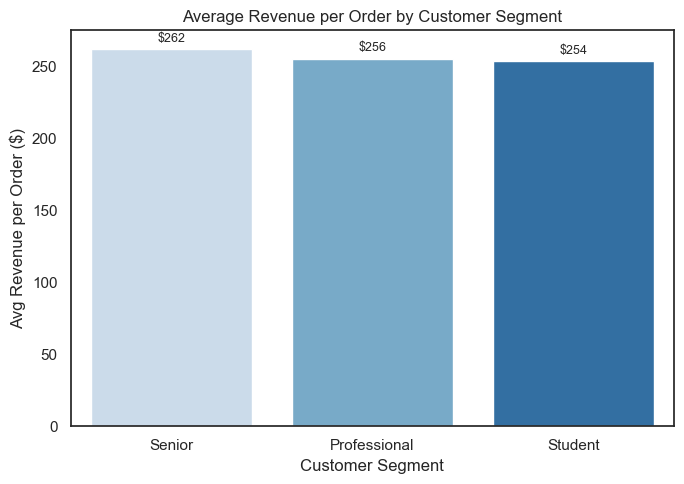

Senior has the highest average revenue per order at $262.13.
In terms of average revenue per order, seniors lead the way.
However, the difference in average revenue per order is small.
If we take a look at the median, we can see that professionals have a median revenue of 
~$15 more than Seniors and 
~$9 more than Students.
This may mean that professionals make more large purchases, while seniors may be skewed due to making the fewest purchases.


In [17]:
# Ensure data is available
try:
    data
except NameError:
    import pandas as pd
    try:
        data = pd.read_csv('ecommerce_data.csv')
    except FileNotFoundError:
        raise FileNotFoundError("ecommerce_data.csv not found. Please run the 'Dataset Setup' cell at the top of the notebook, then rerun this cell.")

# Compute average revenue per order by customer segment
seg_stats = (
    data.groupby('customer_segment')
        .agg(
            orders=('order_id', 'count'),
            avg_revenue_per_order=('revenue', 'mean'),
            median_revenue_per_order=('revenue', 'median')
        )
        .sort_values('avg_revenue_per_order', ascending=False)
        .reset_index()
)

# Display tidy table with currency formatting
disp = seg_stats.copy()
disp['avg_revenue_per_order'] = disp['avg_revenue_per_order'].map(lambda x: f"${x:,.2f}")
disp['median_revenue_per_order'] = disp['median_revenue_per_order'].map(lambda x: f"${x:,.2f}")
try:
    display(disp.style.hide(axis='index'))
except Exception:
    display(disp)

# Visualization — bar chart (no grid) of average revenue per order by segment
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(7, 5))
palette = sns.color_palette('Blues', n_colors=len(seg_stats))
# Updated for seaborn FutureWarning: provide hue=x and remove legend
try:
    sns.barplot(data=seg_stats, x='customer_segment', y='avg_revenue_per_order', hue='customer_segment', palette=palette, ax=ax, legend=False)
except TypeError:
    # Older seaborn versions may not support legend parameter directly
    sns.barplot(data=seg_stats, x='customer_segment', y='avg_revenue_per_order', hue='customer_segment', palette=palette, ax=ax)
    leg = ax.get_legend()
    if leg:
        leg.remove()
ax.set_title('Average Revenue per Order by Customer Segment')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Avg Revenue per Order ($)')
ax.grid(False)

# Annotate bars with dollar values
for p in ax.patches:
    val = p.get_height()
    ax.annotate(f"${val:,.0f}",
                (p.get_x() + p.get_width() / 2, val),
                ha='center', va='bottom', fontsize=9,
                xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()

# Brief interpretation
if not seg_stats.empty:
    top_seg = seg_stats.iloc[0]
    print(f"{top_seg['customer_segment']} has the highest average revenue per order at ${top_seg['avg_revenue_per_order']:,.2f}.")
else:
    print("No data available to compute segment averages.")

insight = """In terms of average revenue per order, seniors lead the way.
However, the difference in average revenue per order is small.
If we take a look at the median, we can see that professionals have a median revenue of 
~$15 more than Seniors and 
~$9 more than Students.
This may mean that professionals make more large purchases, while seniors may be skewed due to making the fewest purchases."""
print(insight)

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Region,total_revenue,avg_order_size
East,"$6,229.22",$214.80
North,"$5,020.18",$251.01
South,"$6,888.87",$275.55
West,"$4,354.96",$256.17


Last quarter: 2024Q1
Highest total revenue: South ($6,888.87)
Highest average order size: South ($275.55)


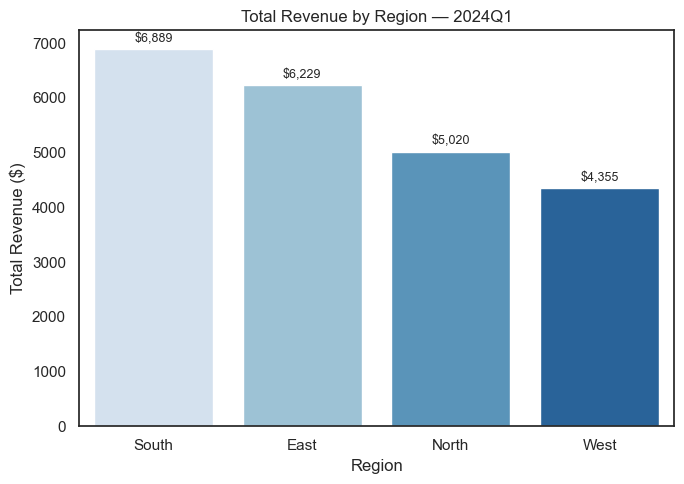

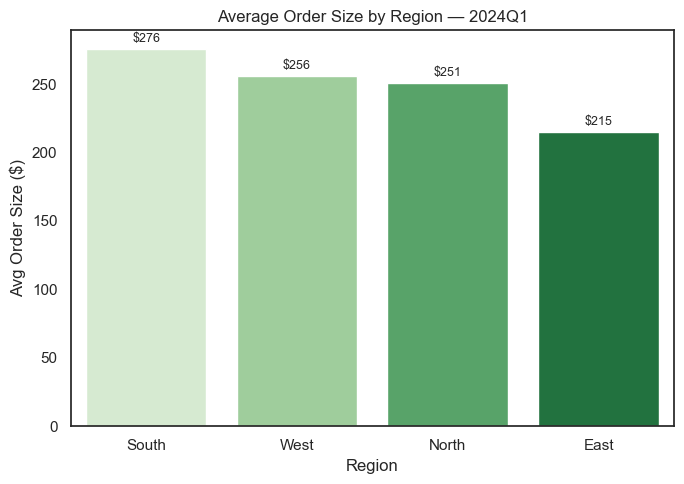

The region with the highest total revenue in the last quarter was the South.
        It had both the highest total revenue and the highest average order size.
        This leaves the business with the option of pursuing sales in the South, where it knows customers will spend more,
        or focusing on other regions that aren't performing as well.


In [19]:
# Ensure data is available
try:
    data
except NameError:
    import pandas as pd
    try:
        data = pd.read_csv('ecommerce_data.csv')
    except FileNotFoundError:
        raise FileNotFoundError("ecommerce_data.csv not found. Please run the 'Dataset Setup' cell at the top of the notebook, then rerun this cell.")

# Ensure proper types
data['order_date'] = pd.to_datetime(data['order_date'])

# Determine the most recent complete quarter in the dataset (same approach as Revenue Overview)
monthly_presence = (
    data.assign(month=data['order_date'].dt.to_period('M'), q=data['order_date'].dt.to_period('Q'))
        .groupby('q')['month'].nunique()
)
complete_quarters = monthly_presence[monthly_presence >= 3].index
last_quarter = complete_quarters.max() if len(complete_quarters) else data['order_date'].dt.to_period('Q').max()

# Filter to last quarter
mask_last_q = data['order_date'].dt.to_period('Q') == last_quarter
data_lq = data.loc[mask_last_q].copy()

# Compute totals and averages by region
rev_by_region = (
    data_lq.groupby('region')['revenue']
        .sum()
        .sort_values(ascending=False)
)
avg_order_by_region = (
    data_lq.groupby('region')['revenue']
        .mean()
        .sort_values(ascending=False)
)

# Tidy combined table
import numpy as np
stats_df = (
    pd.DataFrame({
        'total_revenue': rev_by_region,
        'avg_order_size': data_lq.groupby('region')['revenue'].mean()
    })
    .reset_index()
    .rename(columns={'region': 'Region'})
)

# Nicely formatted display
fmt_df = stats_df.copy()
fmt_df['total_revenue'] = fmt_df['total_revenue'].map(lambda x: f"${x:,.2f}")
fmt_df['avg_order_size'] = fmt_df['avg_order_size'].map(lambda x: f"${x:,.2f}")
try:
    display(fmt_df.style.hide(axis='index'))
except Exception:
    display(fmt_df)

# Identify leaders
top_rev_region = rev_by_region.idxmax() if not rev_by_region.empty else None
top_rev_value = rev_by_region.max() if not rev_by_region.empty else np.nan
top_avg_region = avg_order_by_region.idxmax() if not avg_order_by_region.empty else None
top_avg_value = avg_order_by_region.max() if not avg_order_by_region.empty else np.nan

print(f"Last quarter: {last_quarter}")
if top_rev_region:
    print(f"Highest total revenue: {top_rev_region} (${top_rev_value:,.2f})")
if top_avg_region:
    print(f"Highest average order size: {top_avg_region} (${top_avg_value:,.2f})")

# Visualizations (no grid)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# 1) Total revenue by region (last quarter)
fig, ax = plt.subplots(figsize=(7, 5))
rev_palette = sns.color_palette('Blues', n_colors=len(rev_by_region))
# Provide hue per seaborn guidance to avoid FutureWarning
try:
    sns.barplot(x=rev_by_region.index, y=rev_by_region.values, hue=rev_by_region.index, palette=rev_palette, ax=ax, legend=False)
except TypeError:
    sns.barplot(x=rev_by_region.index, y=rev_by_region.values, hue=rev_by_region.index, palette=rev_palette, ax=ax)
    leg = ax.get_legend()
    if leg:
        leg.remove()
ax.set_title(f'Total Revenue by Region — {str(last_quarter)}')
ax.set_xlabel('Region')
ax.set_ylabel('Total Revenue ($)')
ax.grid(False)
for p, v in zip(ax.patches, rev_by_region.values):
    ax.annotate(f"${v:,.0f}", (p.get_x() + p.get_width()/2, v), ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Average order size by region (last quarter)
fig, ax = plt.subplots(figsize=(7, 5))
avg_palette = sns.color_palette('Greens', n_colors=len(avg_order_by_region))
try:
    sns.barplot(x=avg_order_by_region.index, y=avg_order_by_region.values, hue=avg_order_by_region.index, palette=avg_palette, ax=ax, legend=False)
except TypeError:
    sns.barplot(x=avg_order_by_region.index, y=avg_order_by_region.values, hue=avg_order_by_region.index, palette=avg_palette, ax=ax)
    leg = ax.get_legend()
    if leg:
        leg.remove()
ax.set_title(f'Average Order Size by Region — {str(last_quarter)}')
ax.set_xlabel('Region')
ax.set_ylabel('Avg Order Size ($)')
ax.grid(False)
for p, v in zip(ax.patches, avg_order_by_region.values):
    ax.annotate(f"${v:,.0f}", (p.get_x() + p.get_width()/2, v), ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()

# Brief interpretation (2-3 sentences)
if top_rev_region and top_avg_region:
    interp = (
        """The region with the highest total revenue in the last quarter was the South.
        It had both the highest total revenue and the highest average order size.
        This leaves the business with the option of pursuing sales in the South, where it knows customers will spend more,
        or focusing on other regions that aren't performing as well."""
    )
    print(interp)

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product Category,total_quantity,total_revenue
Home,50,"$6,995.82"
Sports,54,"$5,177.04"
Electronics,45,"$4,644.60"
Books,29,"$3,597.33"
Clothing,30,"$2,078.44"


Last quarter: 2024Q1
Most popular by quantity: Sports (54 units)
Most popular by revenue: Home ($6,995.82)


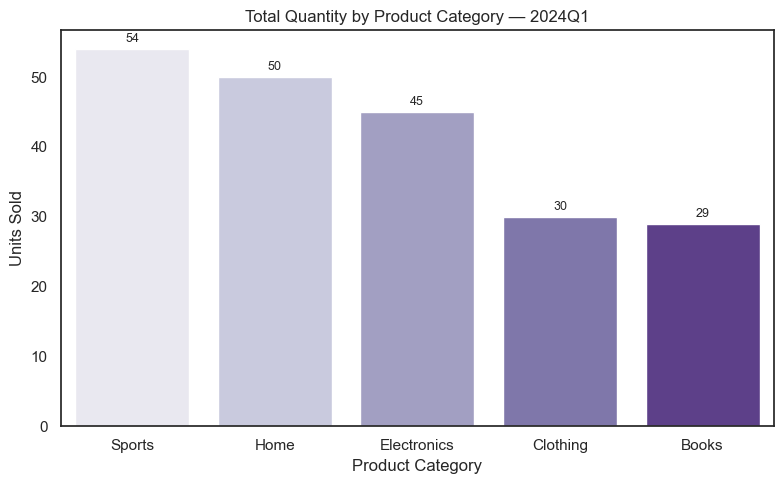

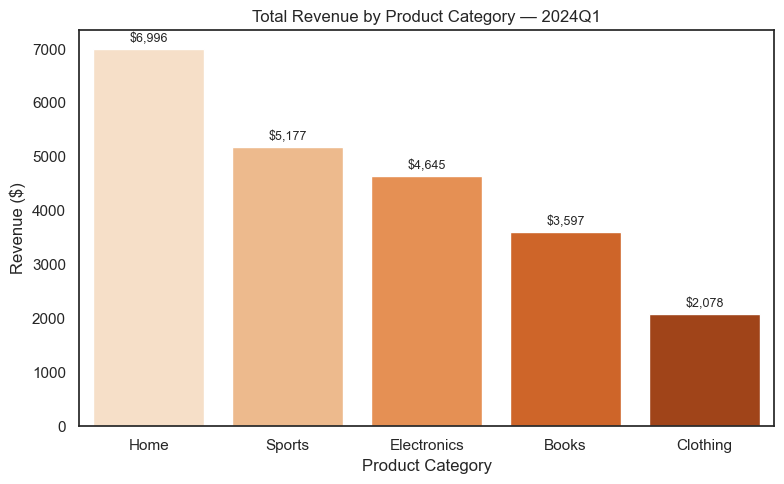

In 2024Q1, Sports sold the most units, while Home generated the most revenue. This indicates quantity leaders aren’t always revenue leaders—likely due to higher prices or larger baskets in revenue-leading categories. Consider pairing promotions on high-margin categories with volume drivers to lift overall revenue.


In [20]:
# Ensure data is available
try:
    data
except NameError:
    import pandas as pd
    try:
        data = pd.read_csv('ecommerce_data.csv')
    except FileNotFoundError:
        raise FileNotFoundError("ecommerce_data.csv not found. Please run the 'Dataset Setup' cell at the top of the notebook, then rerun this cell.")

# Ensure proper types
data['order_date'] = pd.to_datetime(data['order_date'])

# Determine the most recent complete quarter in the dataset (consistent with earlier cells)
monthly_presence = (
    data.assign(month=data['order_date'].dt.to_period('M'), q=data['order_date'].dt.to_period('Q'))
        .groupby('q')['month'].nunique()
)
complete_quarters = monthly_presence[monthly_presence >= 3].index
last_quarter = complete_quarters.max() if len(complete_quarters) else data['order_date'].dt.to_period('Q').max()

# Filter to last quarter
data_lq = data.loc[data['order_date'].dt.to_period('Q') == last_quarter].copy()

# Aggregate by product category (last quarter)
qty_by_cat = (
    data_lq.groupby('product_category')['quantity']
        .sum()
        .sort_values(ascending=False)
)
rev_by_cat = (
    data_lq.groupby('product_category')['revenue']
        .sum()
        .sort_values(ascending=False)
)

# Tidy table
stats_df = (
    pd.DataFrame({
        'total_quantity': data_lq.groupby('product_category')['quantity'].sum(),
        'total_revenue': data_lq.groupby('product_category')['revenue'].sum(),
    })
    .reset_index()
    .rename(columns={'product_category': 'Product Category'})
    .sort_values('total_revenue', ascending=False)
)

fmt_df = stats_df.copy()
fmt_df['total_revenue'] = fmt_df['total_revenue'].map(lambda x: f"${x:,.2f}")
try:
    display(fmt_df.style.hide(axis='index'))
except Exception:
    display(fmt_df)

# Identify leaders
top_qty_cat = qty_by_cat.idxmax() if not qty_by_cat.empty else None
top_qty_val = qty_by_cat.max() if not qty_by_cat.empty else None
top_rev_cat = rev_by_cat.idxmax() if not rev_by_cat.empty else None
top_rev_val = rev_by_cat.max() if not rev_by_cat.empty else None

print(f"Last quarter: {last_quarter}")
if top_qty_cat is not None:
    print(f"Most popular by quantity: {top_qty_cat} ({top_qty_val:,} units)")
if top_rev_cat is not None:
    print(f"Most popular by revenue: {top_rev_cat} (${top_rev_val:,.2f})")

# Visualizations (no grid)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# 1) Total quantity by product category (last quarter)
fig, ax = plt.subplots(figsize=(8, 5))
qty_palette = sns.color_palette('Purples', n_colors=len(qty_by_cat))
try:
    sns.barplot(x=qty_by_cat.index, y=qty_by_cat.values, hue=qty_by_cat.index, palette=qty_palette, ax=ax, legend=False)
except TypeError:
    sns.barplot(x=qty_by_cat.index, y=qty_by_cat.values, hue=qty_by_cat.index, palette=qty_palette, ax=ax)
    leg = ax.get_legend()
    if leg:
        leg.remove()
ax.set_title(f'Total Quantity by Product Category — {str(last_quarter)}')
ax.set_xlabel('Product Category')
ax.set_ylabel('Units Sold')
ax.grid(False)
for p, v in zip(ax.patches, qty_by_cat.values):
    ax.annotate(f"{int(v):,}", (p.get_x() + p.get_width()/2, v), ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Total revenue by product category (last quarter)
fig, ax = plt.subplots(figsize=(8, 5))
rev_palette = sns.color_palette('Oranges', n_colors=len(rev_by_cat))
try:
    sns.barplot(x=rev_by_cat.index, y=rev_by_cat.values, hue=rev_by_cat.index, palette=rev_palette, ax=ax, legend=False)
except TypeError:
    sns.barplot(x=rev_by_cat.index, y=rev_by_cat.values, hue=rev_by_cat.index, palette=rev_palette, ax=ax)
    leg = ax.get_legend()
    if leg:
        leg.remove()
ax.set_title(f'Total Revenue by Product Category — {str(last_quarter)}')
ax.set_xlabel('Product Category')
ax.set_ylabel('Revenue ($)')
ax.grid(False)
for p, v in zip(ax.patches, rev_by_cat.values):
    ax.annotate(f"${v:,.0f}", (p.get_x() + p.get_width()/2, v), ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()

# Brief interpretation (2-3 sentences)
if top_qty_cat is not None and top_rev_cat is not None:
    interp = (
        f"In {last_quarter}, {top_qty_cat} sold the most units, while {top_rev_cat} generated the most revenue. "
        "This indicates quantity leaders aren’t always revenue leaders—likely due to higher prices or larger baskets in revenue-leading categories. "
        "Consider pairing promotions on high-margin categories with volume drivers to lift overall revenue."
    )
    print(interp)

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# Your code here

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [ ]:
# Your code here

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

In [ ]:
# Your code here

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [ ]:
# Your code here

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.